# Experiment01: PTB dataset, input stage
## SAMPLE THE DATA

In [1]:
import wfdb as wfdb
import matplotlib 
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

E:\Downloads\ANACONDA3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Downloads\ANACONDA3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
E:\Downloads\ANACONDA3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
E:\Downloads\ANACONDA3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


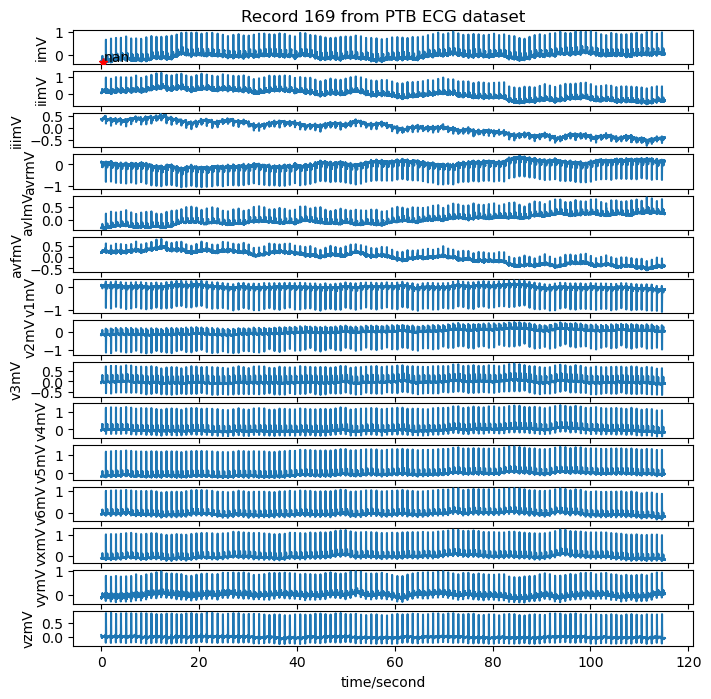

In [31]:
record_ptb = wfdb.rdrecord('ptb_ecg_db/patient169/s0329lre')
annotation_ptb = wfdb.rdann('ptb_ecg_db/patient169/s0329lre', 'dat', sampto = 1000)
wfdb.plot_wfdb(record=record_ptb, annotation=annotation_ptb, title='Record 169 from PTB ECG dataset',
               plot_sym=True,
               time_units='seconds',figsize=(8,8)) 

In [5]:
#print(record_ptb) ##record object
#display(record_ptb.__dict__) ##parts of .dat file #including record name, sex, p_signal, Pulmonary artery pressure...etc
display(record_ptb.p_signal) ##sample of Healthy P signal

array([[-0.3025,  0.0625,  0.3645, ..., -0.12  , -0.121 ,  0.0605],
       [-0.3035,  0.0595,  0.3625, ..., -0.1245, -0.1145,  0.0595],
       [-0.308 ,  0.0595,  0.3675, ..., -0.127 , -0.1075,  0.054 ],
       ...,
       [ 0.047 , -0.3735, -0.4205, ..., -0.1855,  0.029 , -0.057 ],
       [ 0.043 , -0.372 , -0.415 , ..., -0.187 ,  0.03  , -0.057 ],
       [ 0.055 , -0.364 , -0.419 , ..., -0.184 ,  0.0365, -0.058 ]])

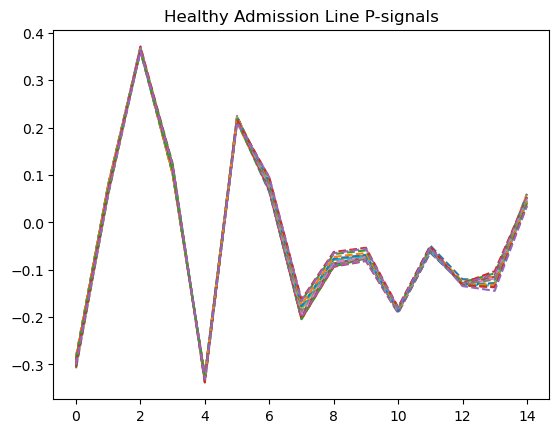

In [23]:
#plot healthy p_signal
plt.figure(dpi=100)
plt.plot(record_ptb.p_signal[0], linestyle='--')
plt.plot(record_ptb.p_signal[1], linestyle='--')
plt.plot(record_ptb.p_signal[2], linestyle='--')
plt.plot(record_ptb.p_signal[3], linestyle='--')
plt.plot(record_ptb.p_signal[4], linestyle='--')
plt.plot(record_ptb.p_signal[5], linestyle='--')
plt.plot(record_ptb.p_signal[6], linestyle='--')
plt.plot(record_ptb.p_signal[7], linestyle='--')
plt.plot(record_ptb.p_signal[8], linestyle='--')
plt.plot(record_ptb.p_signal[9], linestyle='--')
plt.plot(record_ptb.p_signal[10], linestyle='--')
plt.plot(record_ptb.p_signal[11], linestyle='--')
plt.plot(record_ptb.p_signal[12], linestyle='--')
plt.plot(record_ptb.p_signal[13], linestyle='--')
plt.plot(record_ptb.p_signal[14], linestyle='--')
plt.title('Healthy Admission Line P-signals')
plt.show()

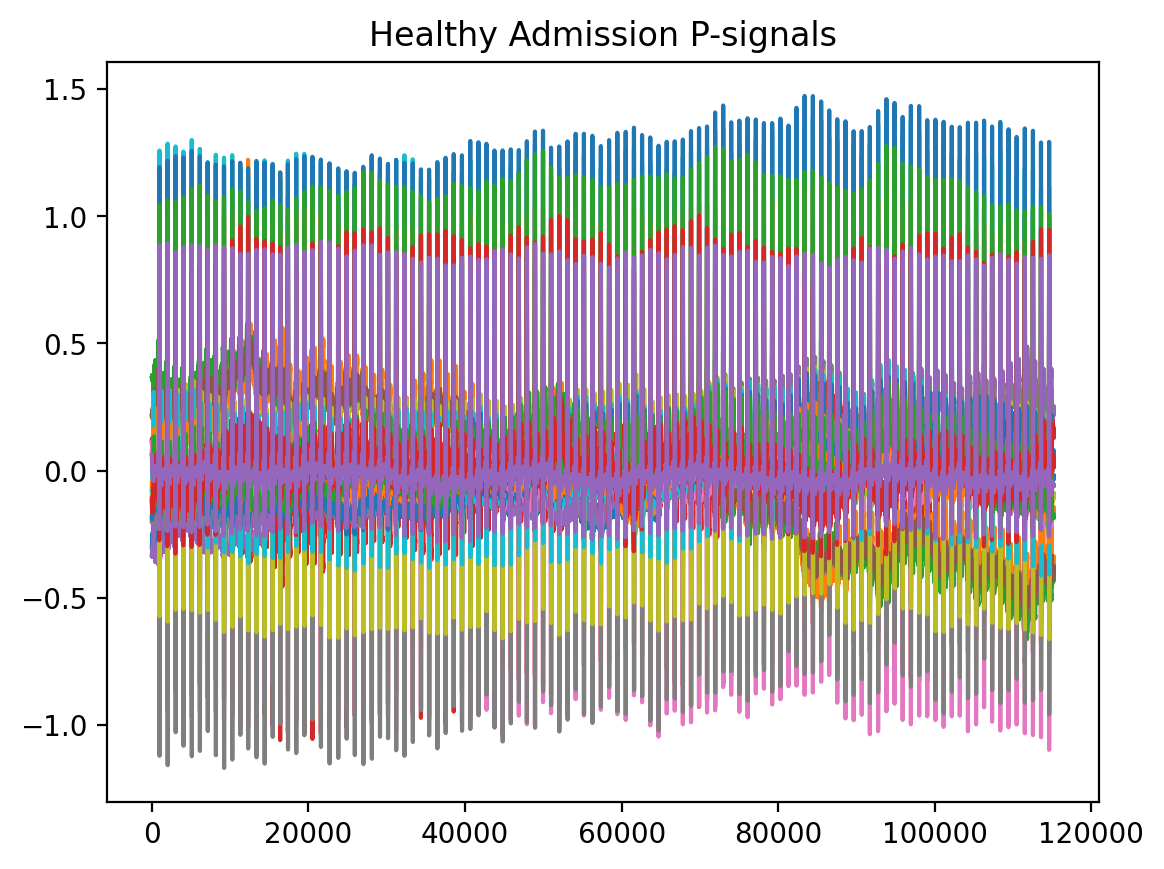

In [24]:
plt.figure(dpi=200)
plt.title('Healthy Admission P-signals')
plt.plot(record_ptb.p_signal)

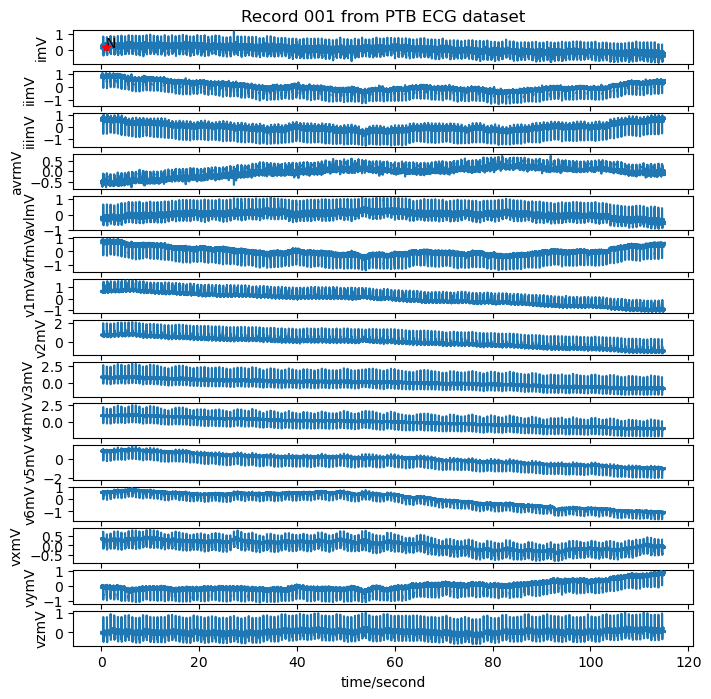

In [2]:
record_ptb2 = wfdb.rdrecord('ptb-diagnostic-ecg-database-1.0.0/patient001/s0016lre')
annotation_ptb2 = wfdb.rdann('ptb-diagnostic-ecg-database-1.0.0/patient001/s0016lre', 'dat', sampto = 1000)
wfdb.plot_wfdb(record=record_ptb2, annotation=annotation_ptb2, title='Record 001 from PTB ECG dataset',
               plot_sym=True,
               time_units='seconds',figsize=(8,8)) 

In [4]:
print(annotation_ptb2)

In [25]:
display(record_ptb2.p_signal) ##sample of MI P signal

array([[ 0.254 ,  0.7535,  0.499 , ...,  0.385 , -0.131 ,  0.029 ],
       [ 0.263 ,  0.7615,  0.498 , ...,  0.38  , -0.132 ,  0.024 ],
       [ 0.2755,  0.786 ,  0.51  , ...,  0.382 , -0.118 ,  0.0245],
       ...,
       [-0.2975,  0.4935,  0.79  , ..., -0.095 ,  0.9445,  0.032 ],
       [-0.256 ,  0.5125,  0.7685, ..., -0.0905,  0.9355,  0.0375],
       [-0.226 ,  0.5445,  0.77  , ..., -0.086 ,  0.9295,  0.041 ]])

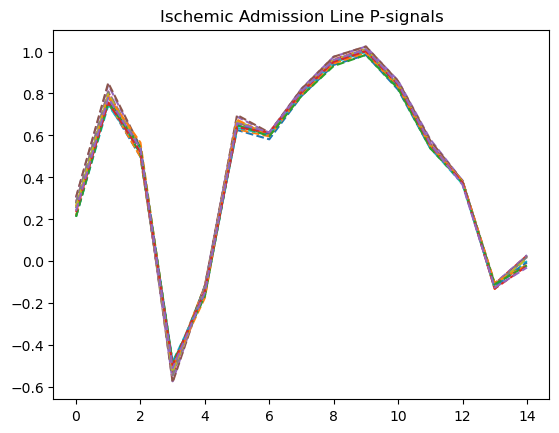

In [26]:
#plot mi p_signal
plt.figure(dpi=100)
plt.plot(record_ptb2.p_signal[0], linestyle='--')
plt.plot(record_ptb2.p_signal[1], linestyle='--')
plt.plot(record_ptb2.p_signal[2], linestyle='--')
plt.plot(record_ptb2.p_signal[3], linestyle='--')
plt.plot(record_ptb2.p_signal[4], linestyle='--')
plt.plot(record_ptb2.p_signal[5], linestyle='--')
plt.plot(record_ptb2.p_signal[6], linestyle='--')
plt.plot(record_ptb2.p_signal[7], linestyle='--')
plt.plot(record_ptb2.p_signal[8], linestyle='--')
plt.plot(record_ptb2.p_signal[9], linestyle='--')
plt.plot(record_ptb2.p_signal[10], linestyle='--')
plt.plot(record_ptb2.p_signal[11], linestyle='--')
plt.plot(record_ptb2.p_signal[12], linestyle='--')
plt.plot(record_ptb2.p_signal[13], linestyle='--')
plt.plot(record_ptb2.p_signal[14], linestyle='--')
plt.title('Ischemic Admission Line P-signals')
plt.show()

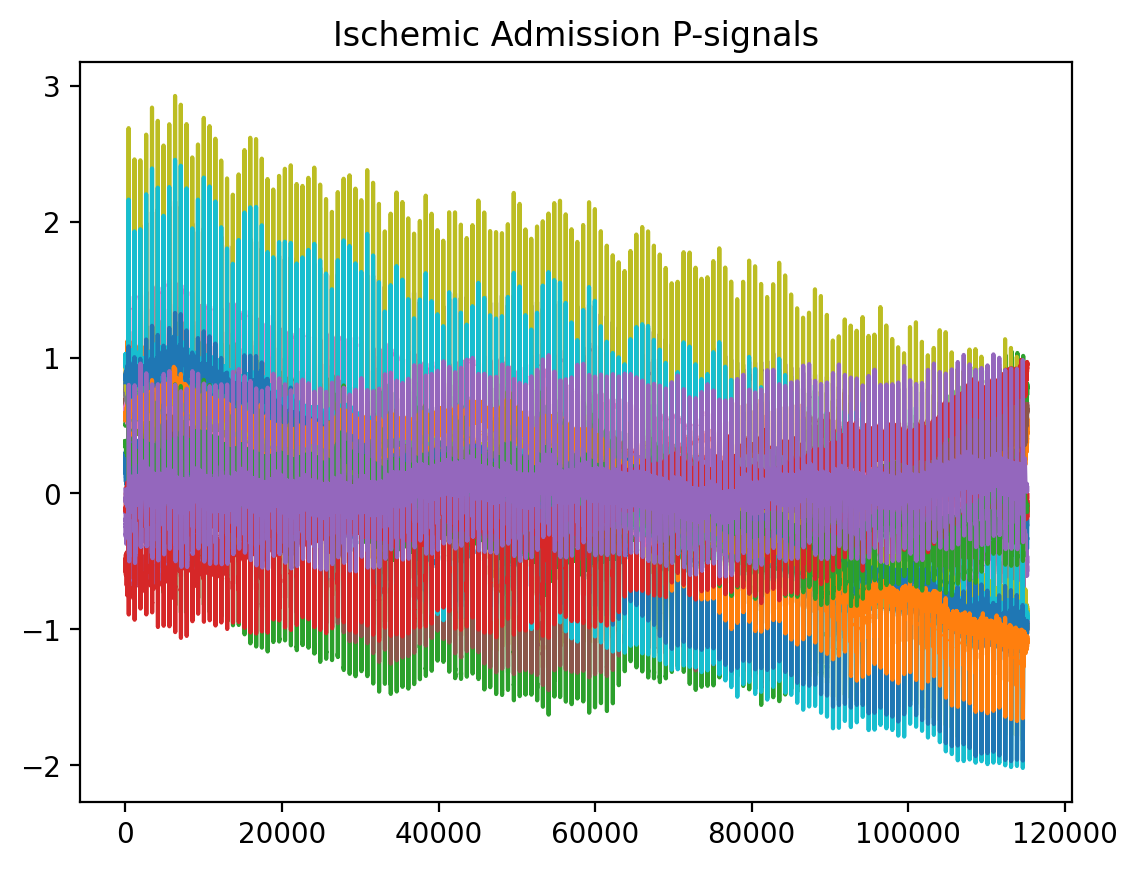

In [27]:
plt.figure(dpi=200)
plt.title('Ischemic Admission P-signals')
plt.plot(record_ptb2.p_signal)

## PREPROCESSING

### FILTERATION: FIR(LOW PASS), NOTCH FILTER, BUTTERWORTH FILTER(HIGH PASS)

In [2]:
#Convert all to csv then to txt
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import glob
import wfdb
import pandas as pd

In [3]:
ptb_path = r'ptb_ecg_db/*/*' ##all files
ptb_files = glob.glob(ptb_path)

In [4]:
#print(files)
len(ptb_files)

1647

In [5]:
ptb_record_list = [] ##use record list only
for i in range(len(ptb_files)):
    name = os.path.splitext(ptb_files[i])[0]
    ptb_record_list.append(wfdb.rdrecord(name, sampto=1000))

In [6]:
ptb_record_list[281]##true

In [7]:
ptb_df_list = []
for i in range(len(ptb_record_list)):
    ptb_df_list.append(pd.DataFrame(ptb_record_list[i].p_signal, columns=ptb_record_list[i].sig_name))
    name = 'ptb_ecg_db_csv/' + str(i) + '.csv'
    ptb_df_list[i].to_csv(name, index=False)

In [8]:
ptb_df_list[281]##ECG info

,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6,vx,vy,vz
0,-0.1990,-0.6680,-0.4690,0.4335,0.1350,-0.5685,0.3580,0.3070,-0.0880,0.0215,-0.2285,-0.2725,-0.2225,-0.4500,-0.2180
1,-0.1885,-0.6615,-0.4720,0.4250,0.1415,-0.5670,0.3465,0.2995,-0.0955,0.0165,-0.2365,-0.2790,-0.2230,-0.4565,-0.2185
2,-0.1895,-0.6595,-0.4700,0.4245,0.1400,-0.5650,0.3555,0.3125,-0.0895,0.0190,-0.2345,-0.2785,-0.2240,-0.4515,-0.2195
3,-0.1890,-0.6645,-0.4750,0.4270,0.1430,-0.5700,0.3505,0.3010,-0.0915,0.0190,-0.2330,-0.2775,-0.2210,-0.4555,-0.2175
4,-0.1980,-0.6750,-0.4770,0.4365,0.1395,-0.5765,0.3510,0.2980,-0.0900,0.0220,-0.2290,-0.2755,-0.2215,-0.4620,-0.2150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.0920,-0.4030,-0.3110,0.2470,0.1095,-0.3570,0.1230,-0.0735,-0.3480,-0.0635,-0.1615,-0.1680,-0.1870,-0.2480,-0.1355
996,-0.1000,-0.4205,-0.3200,0.2600,0.1100,-0.3705,0.1265,-0.0720,-0.3460,-0.0615,-0.1590,-0.1670,-0.1870,-0.2640,-0.1360
997,-0.1030,-0.4250,-0.3220,0.2635,0.1095,-0.3735,0.1255,-0.0785,-0.3480,-0.0665,-0.1580,-0.1675,-0.1850,-0.2670,-0.1350
998,-0.1045,-0.4310,-0.3265,0.2675,0.1110,-0.3790,0.1240,-0.0795,-0.3490,-0.0670,-0.1570,-0.1675,-0.1830,-0.2770,-0.1320


In [7]:
##from waveform dict to dataframe, patient info
record_ptb_test = wfdb.rdrecord(os.path.splitext(ptb_files[7])[0])##patient 2

In [8]:
display(record_ptb_test.comments[0:10]) ##used for one-hot encoding as labels, find unique comments

['age: 81',
 'sex: female',
 'ECG date: 18/10/1990',
 'Diagnose:',
 'Reason for admission: Myocardial infarction',
 'Acute infarction (localization): infero-latera',
 'Former infarction (localization): no',
 'Additional diagnoses: Diabetes mellitus',
 'Smoker: no',
 'Number of coronary vessels involved: 1']

In [9]:
display(ptb_record_list[677].comments[4][21:])  ##labels per image #for image subclasses

' Myocardial infarction'

In [9]:
#get labels and append them to label list
ptb_label_list = []
for i in range(0, len(ptb_record_list)):
    display(ptb_record_list[i].comments[4][21:])
    ptb_label_list.append(ptb_record_list[i].comments[4][21:])

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Valvular heart disease'

' Valvular heart disease'

' Valvular heart disease'

' Valvular heart disease'

' Valvular heart disease'

' Valvular heart disease'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Valvular heart disease'

' Valvular heart disease'

' Valvular heart disease'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Valvular heart disease'

' Valvular heart disease'

' Valvular heart disease'

' Heart failure (NYHA 2)'

' Heart failure (NYHA 2)'

' Heart failure (NYHA 2)'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Heart failure (NYHA 3)'

' Heart failure (NYHA 3)'

' Heart failure (NYHA 3)'

' n/a'

' n/a'

' n/a'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Heart failure (NYHA 4)'

' Heart failure (NYHA 4)'

' Heart failure (NYHA 4)'

' n/a'

' n/a'

' n/a'

' Palpitation'

' Palpitation'

' Palpitation'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Stable angina'

' Stable angina'

' Stable angina'

' Healthy control'

' Healthy control'

' Healthy control'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' n/a'

' n/a'

' n/a'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' n/a'

' n/a'

' n/a'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Healthy control'

' Healthy control'

' Healthy control'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' n/a'

' n/a'

' n/a'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Hypertrophy'

' Hypertrophy'

' Hypertrophy'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' n/a'

' n/a'

' n/a'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' n/a'

' n/a'

' n/a'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' Healthy control'

' Healthy control'

' Healthy control'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' n/a'

' n/a'

' n/a'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Valvular heart disease'

' Valvular heart disease'

' Valvular heart disease'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' Stable angina'

' Stable angina'

' Stable angina'

' n/a'

' n/a'

' n/a'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' n/a'

' n/a'

' n/a'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Unstable angina'

' Unstable angina'

' Unstable angina'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' n/a'

' n/a'

' n/a'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Hypertrophy'

' Hypertrophy'

' Hypertrophy'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Hypertrophy'

' Hypertrophy'

' Hypertrophy'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Healthy control'

' Healthy control'

' Healthy control'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Hypertrophy'

' Hypertrophy'

' Hypertrophy'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Hypertrophy'

' Hypertrophy'

' Hypertrophy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Valvular heart disease'

' Valvular heart disease'

' Valvular heart disease'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Hypertrophy'

' Hypertrophy'

' Hypertrophy'

' Bundle branch block'

' Bundle branch block'

' Bundle branch block'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Myocarditis'

' Myocarditis'

' Myocarditis'

' Hypertrophy'

' Hypertrophy'

' Hypertrophy'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Healthy control'

' Healthy control'

' Healthy control'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Healthy control'

' Healthy control'

' Healthy control'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocarditis'

' Myocarditis'

' Myocarditis'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocarditis'

' Myocarditis'

' Myocarditis'

' Myocarditis'

' Myocarditis'

' Myocarditis'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' n/a'

' n/a'

' n/a'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' n/a'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' n/a'

' n/a'

' n/a'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' Healthy control'

' n/a'

' n/a'

' n/a'

' Dysrhythmia'

' Dysrhythmia'

' Dysrhythmia'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Cardiomyopathy'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

' Myocardial infarction'

In [10]:
##replace n/a with Unqualified
for label in range(0,len(ptb_label_list)):
    if(ptb_label_list[label] == ' n/a'):
        ptb_label_list[label] = ' Unqualified'

In [12]:
#ptb_label_list##true

In [63]:
for i in range(len(ptb_record_list)): #to text file
    name = 'ptb_ecg_db_csv/' + str(i) + '.csv'
    name2 = 'ptb_ecg_db_txt/' + str(i) + '_' + ptb_label_list[i] + '.txt'
    with open(name, 'r') as f_in, open(name2, 'w') as f_out:   
        content = f_in.read()
        f_out.write(content)

In [40]:
keys_to_extract = ['record_name', 'n_sig', 'fs', 'counter_freq', 'base_counter', 'sig_len', 'base_time',
 'base_date','comments']
extracted_dict = {}
 
# extracting keys using a for loop and conditional statement
for key, value in record_ptb_test.__dict__.items():
    if key in keys_to_extract:
        extracted_dict[key] = value
 
# printing the extracted dictionary
#print("The extracted dictionary is:", extracted_dict)

In [41]:
df = pd.DataFrame(extracted_dict)

In [42]:
df.head()

,record_name,n_sig,fs,counter_freq,base_counter,sig_len,base_time,base_date,comments
0,s0016lre,15,1000,None,None,115200,None,None,age: 81
1,s0016lre,15,1000,None,None,115200,None,None,sex: female
2,s0016lre,15,1000,None,None,115200,None,None,ECG date: 18/10/1990
3,s0016lre,15,1000,None,None,115200,None,None,Diagnose:
4,s0016lre,15,1000,None,None,115200,None,None,Reason for admission: Myocardial infarction


In [13]:
##convert .txt to 1d array
def txt_array(path):
    unfiltered = []
    with open(path) as data:
        for each_line in data:
            array = each_line.replace("\n", ",").strip()
            unfiltered.append(array)
    return unfiltered

In [22]:
##function for code in cell above
elements_list = []
for i in range(0, len(ptb_record_list)):
    name = 'ptb_ecg_db_txt/' + str(i) + '_' + ptb_label_list[i] + '.txt'
    print('OPEN:', name, '\n')
    elements_list.append(txt_array(name))

OPEN: ptb_ecg_db_txt/0_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/1_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/2_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/3_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/4_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/5_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/6_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/7_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/8_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/9_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/10_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/11_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/12_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/13_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/14_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/15_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/16_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/17_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/18_ Myocardial infarction.txt 

OPE

OPEN: ptb_ecg_db_txt/160_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/161_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/162_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/163_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/164_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/165_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/166_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/167_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/168_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/169_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/170_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/171_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/172_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/173_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/174_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/175_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/176_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/177_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/178_ My

OPEN: ptb_ecg_db_txt/379_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/380_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/381_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/382_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/383_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/384_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/385_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/386_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/387_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/388_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/389_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/390_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/391_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/392_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/393_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/394_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/395_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/396_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/397_ My

OPEN: ptb_ecg_db_txt/562_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/563_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/564_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/565_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/566_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/567_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/568_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/569_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/570_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/571_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/572_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/573_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/574_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/575_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/576_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/577_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/578_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/579_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/580_ My

OPEN: ptb_ecg_db_txt/753_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/754_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/755_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/756_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/757_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/758_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/759_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/760_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/761_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/762_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/763_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/764_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/765_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/766_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/767_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/768_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/769_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/770_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/771_ My

OPEN: ptb_ecg_db_txt/967_ Valvular heart disease.txt 

OPEN: ptb_ecg_db_txt/968_ Valvular heart disease.txt 

OPEN: ptb_ecg_db_txt/969_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/970_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/971_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/972_ Dysrhythmia.txt 

OPEN: ptb_ecg_db_txt/973_ Dysrhythmia.txt 

OPEN: ptb_ecg_db_txt/974_ Dysrhythmia.txt 

OPEN: ptb_ecg_db_txt/975_ Dysrhythmia.txt 

OPEN: ptb_ecg_db_txt/976_ Dysrhythmia.txt 

OPEN: ptb_ecg_db_txt/977_ Dysrhythmia.txt 

OPEN: ptb_ecg_db_txt/978_ Dysrhythmia.txt 

OPEN: ptb_ecg_db_txt/979_ Dysrhythmia.txt 

OPEN: ptb_ecg_db_txt/980_ Dysrhythmia.txt 

OPEN: ptb_ecg_db_txt/981_ Valvular heart disease.txt 

OPEN: ptb_ecg_db_txt/982_ Valvular heart disease.txt 

OPEN: ptb_ecg_db_txt/983_ Valvular heart disease.txt 

OPEN: ptb_ecg_db_txt/984_ Heart failure (NYHA 2).txt 

OPEN: ptb_ecg_db_txt/985_ Heart failure (NYHA 2).txt 

OPEN: ptb_ecg_db_txt/986_ Heart failure (NYHA 2).txt 

OP

OPEN: ptb_ecg_db_txt/1167_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1168_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1169_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1170_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1171_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1172_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1173_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1174_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1175_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1176_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1177_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1178_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1179_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1180_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1181_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1182_ Bundle branch block.txt 

OPEN: ptb_ecg_db_txt/1183_ Bundle branch block.txt 

OPEN: ptb_ecg_db_txt/1184_ Bundle branch block.txt 

OPEN: ptb_ecg_db_txt/1185_ Unqualified.txt 

OPEN: ptb_ecg_db_txt/1186_ Unqualified.txt 

OPEN: ptb_ecg_db

OPEN: ptb_ecg_db_txt/1375_ Bundle branch block.txt 

OPEN: ptb_ecg_db_txt/1376_ Bundle branch block.txt 

OPEN: ptb_ecg_db_txt/1377_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/1378_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/1379_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/1380_ Hypertrophy.txt 

OPEN: ptb_ecg_db_txt/1381_ Hypertrophy.txt 

OPEN: ptb_ecg_db_txt/1382_ Hypertrophy.txt 

OPEN: ptb_ecg_db_txt/1383_ Bundle branch block.txt 

OPEN: ptb_ecg_db_txt/1384_ Bundle branch block.txt 

OPEN: ptb_ecg_db_txt/1385_ Bundle branch block.txt 

OPEN: ptb_ecg_db_txt/1386_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1387_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1388_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1389_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1390_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1391_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1392_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/1393_ Myocardial infarction.txt 

OPEN: ptb_ecg_db_txt/1394_ Myoc

OPEN: ptb_ecg_db_txt/1564_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1565_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1566_ Unqualified.txt 

OPEN: ptb_ecg_db_txt/1567_ Unqualified.txt 

OPEN: ptb_ecg_db_txt/1568_ Unqualified.txt 

OPEN: ptb_ecg_db_txt/1569_ Unqualified.txt 

OPEN: ptb_ecg_db_txt/1570_ Unqualified.txt 

OPEN: ptb_ecg_db_txt/1571_ Unqualified.txt 

OPEN: ptb_ecg_db_txt/1572_ Unqualified.txt 

OPEN: ptb_ecg_db_txt/1573_ Unqualified.txt 

OPEN: ptb_ecg_db_txt/1574_ Unqualified.txt 

OPEN: ptb_ecg_db_txt/1575_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1576_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1577_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1578_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1579_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1580_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1581_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1582_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1583_ Healthy control.txt 

OPEN: ptb_ecg_db_txt/1584_ Healthy control.txt 

OPEN: p

In [23]:
elements_list[23]#[1] ##true test

['i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6,vx,vy,vz,',
 '-1.4525,-1.1085,0.3435,1.2805,-0.8975,-0.383,-0.688,-0.6135,-0.6015,-0.814,-0.882,-1.0775,-0.1555,0.238,-0.0475,',
 '-1.453,-1.109,0.3435,1.281,-0.898,-0.383,-0.6915,-0.623,-0.6095,-0.817,-0.8815,-1.0755,-0.1545,0.2405,-0.044,',
 '-1.452,-1.1075,0.344,1.28,-0.8975,-0.382,-0.691,-0.629,-0.612,-0.8165,-0.8795,-1.0705,-0.153,0.242,-0.042,',
 '-1.454,-1.106,0.3475,1.28,-0.9,-0.3795,-0.6965,-0.64,-0.618,-0.82,-0.8795,-1.069,-0.153,0.243,-0.04,',
 '-1.4545,-1.107,0.3465,1.281,-0.9,-0.3805,-0.6975,-0.6465,-0.622,-0.82,-0.8775,-1.0665,-0.154,0.238,-0.038,',
 '-1.4525,-1.1055,0.3465,1.279,-0.899,-0.38,-0.6995,-0.6555,-0.6265,-0.822,-0.8755,-1.062,-0.152,0.2395,-0.0355,',
 '-1.453,-1.1025,0.35,1.278,-0.901,-0.377,-0.7035,-0.665,-0.633,-0.8205,-0.8725,-1.058,-0.1505,0.2395,-0.033,',
 '-1.451,-1.096,0.3545,1.2735,-0.902,-0.371,-0.7065,-0.6735,-0.64,-0.823,-0.8715,-1.0575,-0.1495,0.252,-0.03,',
 '-1.449,-1.092,0.356,1.271,-0.902,-0.3685,-0.7115

In [24]:
len(elements_list[2])##equal length ecgs

1001

In [25]:
##replace commas in each unfiltered line
##then replace that unfiltered file itself
for i in range(0, len(elements_list)):
    for j in range(len(elements_list[i])):
        elements_list[i][j] = elements_list[i][j].replace(",", "  ")

In [26]:
elements_list[1000][0:5]##true test

['i  ii  iii  avr  avl  avf  v1  v2  v3  v4  v5  v6  vx  vy  vz  ',
 '-0.2805  -0.067  0.2135  0.174  -0.247  0.073  -0.0645  -0.1105  -0.096  -0.2385  -0.1585  -0.13  -0.023  0.084  0.0725  ',
 '-0.282  -0.0635  0.2185  0.1725  -0.25  0.0775  -0.06  -0.1035  -0.0915  -0.237  -0.1565  -0.1285  -0.023  0.083  0.0735  ',
 '-0.2755  -0.056  0.219  0.1655  -0.247  0.0815  -0.066  -0.1065  -0.0935  -0.2375  -0.157  -0.1295  -0.023  0.0835  0.0735  ',
 '-0.2725  -0.054  0.2185  0.163  -0.245  0.082  -0.07  -0.1135  -0.097  -0.2415  -0.1585  -0.133  -0.0235  0.082  0.0745  ']

In [19]:
##example file to get filtered files
def filtered_txt(path, content):
    file = open(path, 'w')
    # Writing a string to file
    file.writelines(content)

In [28]:
for i in range(0, len(elements_list)):
    name = 'ptb_ecg_db_txt_filtered/' + str(i) + '_' + ptb_label_list[i] + '.txt'
    print('OPEN:', name)
    filtered_txt(name, elements_list[i])

OPEN: ptb_ecg_db_txt_filtered/0_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/1_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/2_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/3_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/4_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/5_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/6_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/7_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/8_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/9_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/10_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/11_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/12_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/13_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/14_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/15_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/16_ Myocardial infar

OPEN: ptb_ecg_db_txt_filtered/163_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/164_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/165_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/166_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/167_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/168_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/169_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/170_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/171_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/172_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/173_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/174_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/175_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/176_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/177_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/178_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_fil

OPEN: ptb_ecg_db_txt_filtered/323_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/324_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/325_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/326_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/327_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/328_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/329_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/330_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/331_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/332_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/333_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/334_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/335_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/336_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/337_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/338_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_fil

OPEN: ptb_ecg_db_txt_filtered/476_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/477_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/478_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/479_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/480_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/481_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/482_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/483_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/484_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/485_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/486_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/487_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/488_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/489_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/490_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/491_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_fil

OPEN: ptb_ecg_db_txt_filtered/667_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/668_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/669_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/670_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/671_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/672_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/673_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/674_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/675_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/676_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/677_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/678_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/679_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/680_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/681_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/682_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_fil

OPEN: ptb_ecg_db_txt_filtered/830_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/831_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/832_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/833_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/834_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/835_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/836_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/837_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/838_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/839_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/840_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/841_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/842_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/843_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/844_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/845_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_fil

OPEN: ptb_ecg_db_txt_filtered/998_ Heart failure (NYHA 3).txt
OPEN: ptb_ecg_db_txt_filtered/999_ Unqualified.txt
OPEN: ptb_ecg_db_txt_filtered/1000_ Unqualified.txt
OPEN: ptb_ecg_db_txt_filtered/1001_ Unqualified.txt
OPEN: ptb_ecg_db_txt_filtered/1002_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/1003_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/1004_ Myocardial infarction.txt
OPEN: ptb_ecg_db_txt_filtered/1005_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1006_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1007_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1008_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1009_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1010_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1011_ Heart failure (NYHA 4).txt
OPEN: ptb_ecg_db_txt_filtered/1012_ Heart failure (NYHA 4).txt
OPEN: ptb_ecg_db_txt_filtered/1013_ Heart failure (NYHA 4).txt
OPEN: ptb_ecg_db_txt_filtered/1014_ Unqualified.txt
OPEN: ptb_ecg_db_txt

OPEN: ptb_ecg_db_txt_filtered/1145_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1146_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1147_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1148_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1149_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1150_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1151_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1152_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1153_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1154_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1155_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1156_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1157_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1158_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1159_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1160_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1161_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1162_ Healthy control.txt
OPEN: ptb_ecg_db_tx

OPEN: ptb_ecg_db_txt_filtered/1343_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1344_ Hypertrophy.txt
OPEN: ptb_ecg_db_txt_filtered/1345_ Hypertrophy.txt
OPEN: ptb_ecg_db_txt_filtered/1346_ Hypertrophy.txt
OPEN: ptb_ecg_db_txt_filtered/1347_ Bundle branch block.txt
OPEN: ptb_ecg_db_txt_filtered/1348_ Bundle branch block.txt
OPEN: ptb_ecg_db_txt_filtered/1349_ Bundle branch block.txt
OPEN: ptb_ecg_db_txt_filtered/1350_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1351_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1352_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1353_ Bundle branch block.txt
OPEN: ptb_ecg_db_txt_filtered/1354_ Bundle branch block.txt
OPEN: ptb_ecg_db_txt_filtered/1355_ Bundle branch block.txt
OPEN: ptb_ecg_db_txt_filtered/1356_ Bundle branch block.txt
OPEN: ptb_ecg_db_txt_filtered/1357_ Bundle branch block.txt
OPEN: ptb_ecg_db_txt_filtered/1358_ Bundle branch block.txt
OPEN: ptb_ecg_db_txt_filtered/1359_ Hypertrophy.txt
OPEN: ptb_ecg_db_txt_filtered/1360_ Hyper

OPEN: ptb_ecg_db_txt_filtered/1492_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1493_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1494_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1495_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1496_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1497_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1498_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1499_ Healthy control.txt
OPEN: ptb_ecg_db_txt_filtered/1500_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1501_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1502_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1503_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1504_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1505_ Cardiomyopathy.txt
OPEN: ptb_ecg_db_txt_filtered/1506_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1507_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1508_ Dysrhythmia.txt
OPEN: ptb_ecg_db_txt_filtered/1509_ Myocardial infarction.txt
OPEN: ptb

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, lfilter

In [12]:
##NOTCH FILTER
def baseline_wander(df, lead = 'v2'):
    # Sampling Frequency
    Fs = 1000
    # Notch Frequency for baseline wander
    Fnotch = 0.50
    # Bandwidth
    BW = 5
    # Bandwidth Attenuation
    Apass = 1
    # Design notch filter to remove baseline wander
    b, a = iirnotch(Fnotch / (Fs / 2), BW / (Fs / 2), Apass)
    #x = np.loadtxt('myfile.txt')
    x1 = df[lead]  #get first column all rows[:,1]
    x2 = x1 / max(x1)
    #x = np.loadtxt('myfile.txt')
    return x2

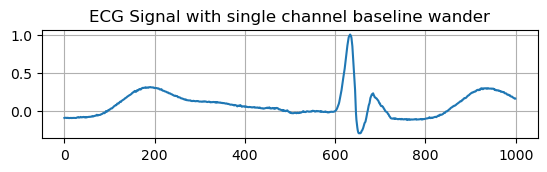

In [13]:
# Plot original ECG signal with baseline wander
plt.subplot(3, 1, 1)
plt.plot(baseline_wander(ptb_df_list[0]))
plt.title('ECG Signal with single channel baseline wander')
plt.grid(True)

In [111]:
##NOTCH FILTER
def multi_baseline_wander(df, leads = ['v2', 'v3', 'v4', 'v5', 'v6']):
    # Sampling Frequency
    Fs = 1000
    # Notch Frequency for baseline wander
    Fnotch = 0.50
    # Bandwidth
    BW = 5
    # Bandwidth Attenuation
    Apass = 1
    b, a = iirnotch(Fnotch / (Fs / 2), BW / (Fs / 2), Apass)
    if(leads[0] == 'v1'):
        x1 = df[leads[0]]  #get multiple channels
        x2 = x1 / max(x1)
    
        x3 = df[leads[1]]  
        x4 = x3 / max(x3)
    
        x5 = df[leads[2]]  
        x6 = x5 / max(x5)
    
        x7 = df[leads[3]]  
        x8 = x7 / max(x7)
    
        x9 = df[leads[4]]  
        x10 = x9 / max(x9)
        
        x11 = df[leads[5]]  
        x12 = x11 / max(x11)
    else:
        x1 = df[leads[0]]  #get multiple channels
        x2 = x1 / max(x1)
    
        x3 = df[leads[1]]  
        x4 = x3 / max(x3)
    
        x5 = df[leads[2]]  
        x6 = x5 / max(x5)
    
        x7 = df[leads[3]]  
        x8 = x7 / max(x7)
    
        x9 = df[leads[4]]  
        x10 = x9 / max(x9)
        
        x12 = 0

    return x2, x4, x6, x8, x10, x12

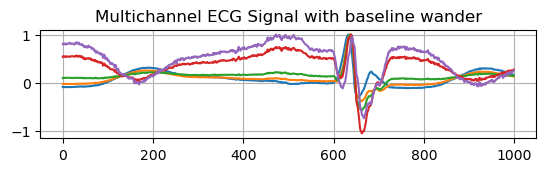

In [114]:
plt.subplot(3, 1, 1)
a, b, c, d, e, f = multi_baseline_wander(ptb_df_list[0])
plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.plot(d)
plt.plot(e)
plt.title('Multichannel ECG Signal with baseline wander')
plt.grid(True)

In [16]:
def baseline_wander_removed(x2):
    # Sampling Frequency
    Fs = 1000
    # Notch Frequency for baseline wander
    Fnotch = 0.50
    # Bandwidth
    BW = 5
    # Bandwidth Attenuation
    Apass = 1
    # Design notch filter to remove baseline wander
    b, a = iirnotch(Fnotch / (Fs / 2), BW / (Fs / 2), Apass)
    # Apply the notch filter to the signal
    y0 = lfilter(b, a, x2)
    
    return y0

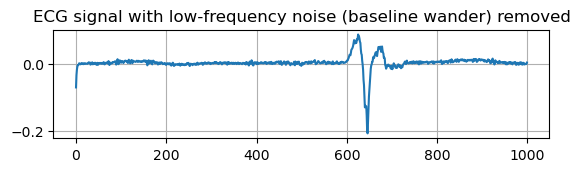

In [17]:
# Plot ECG signal with low-frequency noise (baseline wander) removed
plt.subplot(3, 1, 2)
plt.plot(baseline_wander_removed(baseline_wander(ptb_df_list[0])))
plt.title('ECG signal with low-frequency noise (baseline wander) removed')
plt.grid(True)

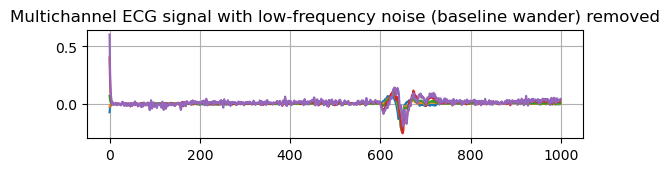

In [18]:
plt.subplot(3, 1, 2)
a, b, c, d, e = multi_baseline_wander(ptb_df_list[0])
plt.plot(baseline_wander_removed(a))
plt.plot(baseline_wander_removed(b))
plt.plot(baseline_wander_removed(c))
plt.plot(baseline_wander_removed(d))
plt.plot(baseline_wander_removed(e))
plt.title('Multichannel ECG signal with low-frequency noise (baseline wander) removed')
plt.grid(True)

In [19]:
def noise_removed(y0):
    # Sampling Frequency
    Fs = 1000
    # Notch Frequency for power line noise
    Fnotch = 50
    # Bandwidth
    BW = 5
    # Bandwidth Attenuation
    Apass = 1
    # Design notch filter to remove power line noise
    b, a = iirnotch(Fnotch / (Fs / 2), BW / (Fs / 2), Apass)
    # Apply the notch filter to the signal
    y1 = lfilter(b, a, y0)
    
    return y1

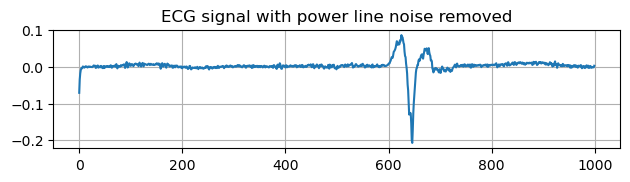

In [20]:
# Plot ECG signal with power line noise removed
plt.subplot(3, 1, 3)
plt.plot(noise_removed(baseline_wander_removed(baseline_wander(ptb_df_list[0], 'v2'))))
plt.title('ECG signal with power line noise removed')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

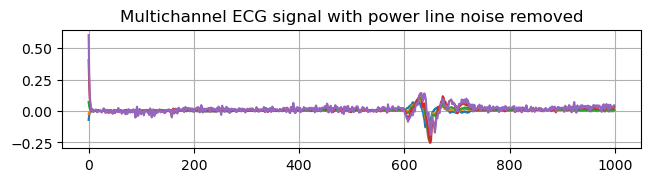

In [21]:
plt.subplot(3, 1, 3)
a, b, c, d, e = multi_baseline_wander(ptb_df_list[0])
a1 = baseline_wander_removed(a)
b1 = baseline_wander_removed(b)
c1 = baseline_wander_removed(c)
d1 = baseline_wander_removed(d)
e1 = baseline_wander_removed(e)
plt.plot(noise_removed(a1))
plt.plot(noise_removed(b1))
plt.plot(noise_removed(c1))
plt.plot(noise_removed(d1))
plt.plot(noise_removed(e1))
plt.title('Multichannel ECG signal with power line noise removed')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

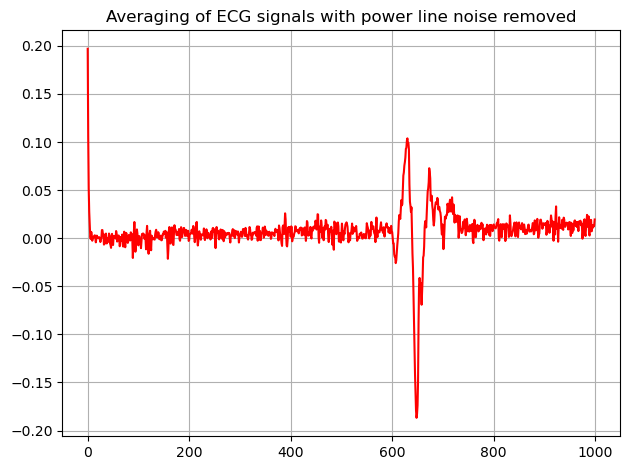

In [27]:
plt.plot((noise_removed(a1) + noise_removed(b1) + noise_removed(c1) + noise_removed(d1) + noise_removed(e1))/5, 
         color = "red")
plt.title('Averaging of ECG signals with power line noise removed')
plt.grid(True)

plt.tight_layout()
plt.show()

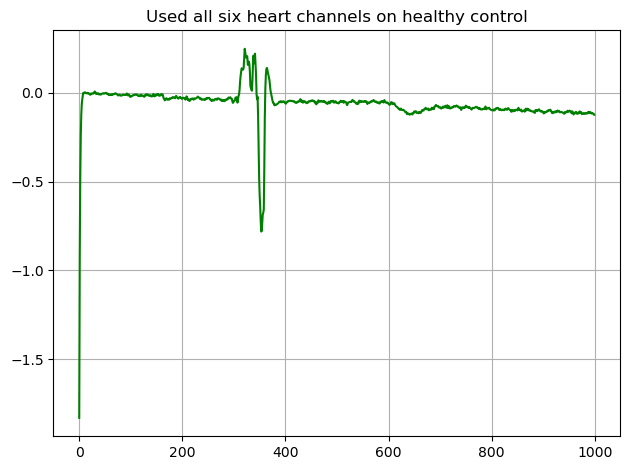

In [121]:
a, b, c, d, e, f = multi_baseline_wander(ptb_df_list[1089], ['v1','v2','v3','v4','v5','v6'])
a1 = baseline_wander_removed(a)
b1 = baseline_wander_removed(b)
c1 = baseline_wander_removed(c)
d1 = baseline_wander_removed(d)
e1 = baseline_wander_removed(e)
f1 = baseline_wander_removed(f)

plt.plot((noise_removed(a1) + noise_removed(b1) + noise_removed(c1) + noise_removed(d1) +
          noise_removed(e1) + noise_removed(f1))/6, 
         color = "green")
plt.title('Used all six heart channels on healthy control')
plt.grid(True)

plt.tight_layout()
plt.show()

In [105]:
np.savetxt('myarray.txt', y1)

### HERMITE TRANSFORM COEFFICIENTS:3RD, 4TH, 5TH DEGREE

In [151]:
#len(y1)

1000

In [28]:
##Return 3rd, 4th, 5th coefficients hermite transform
import numpy as np 
from numpy.polynomial import hermite
import collections

In [29]:
#list of y1
y1_list_single = []
for i in range(0, len(ptb_df_list)):
    y1_list_single.append(noise_removed(baseline_wander_removed(baseline_wander(ptb_df_list[i], 'v2'))))

In [30]:
len(y1_list_single) ##true

1647

In [31]:
#list of y1
y1_list_multiple = []
for i in range(0, len(ptb_df_list)):
    a, b, c, d, e = multi_baseline_wander(ptb_df_list[i])
    a1 = baseline_wander_removed(a)
    b1 = baseline_wander_removed(b)
    c1 = baseline_wander_removed(c)
    d1 = baseline_wander_removed(d)
    e1 = baseline_wander_removed(e)
    avg = (noise_removed(a1) + noise_removed(b1) + noise_removed(c1) + noise_removed(d1) + noise_removed(e1))/5
    y1_list_multiple.append(avg)

In [32]:
len(y1_list_multiple)

1647

In [31]:
##x coords with sampling frequency 1000hz
#max_time = len(y1)/1000
#x = np.linspace(0, max_time, len(y1))

In [108]:
#x coordinate of sampto=1000Hz 
##xvals = np.linspace(-1.0,1.0,1000) 
coeff, stats = hermite.hermfit(x,y1, 3, full=True)
coeff2, stats2 = hermite.hermfit(x,y1, 4, full=True)
coeff3, stats3 = hermite.hermfit(x,y1, 5, full=True)

In [109]:
stats2

[array([25.23156124]),
 5,
 array([1.73697651e+00, 1.39459311e+00, 1.90952585e-01, 3.94633561e-02,
        1.55362867e-03]),
 2.220446049250313e-13]

In [110]:
coeff

array([ 0.91905048, -1.01747632,  0.4070428 , -0.12395714])

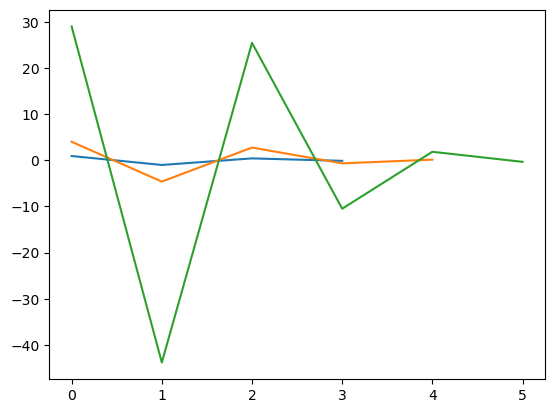

In [111]:
plt.plot(coeff)
plt.plot(coeff2)
plt.plot(coeff3)

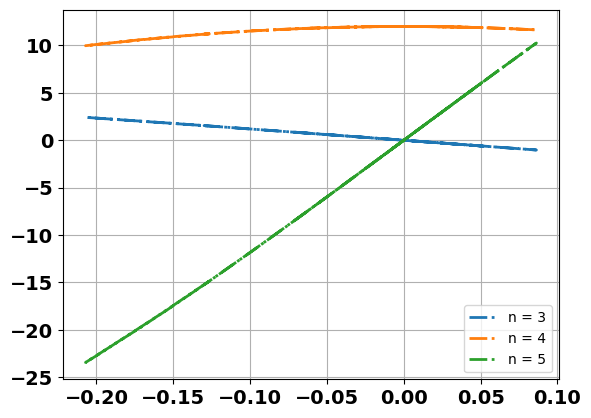

In [33]:
##TRIAL 2 ##PRE CNN
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
import random

def HERMITE(X,N):
    HER = hermite(N)
    sn  = HER(X)
    return sn

##same x as above ##example
for n in np.arange(3,6,1):
    sol = HERMITE(y1_list_single[0],n)
    plt.plot(y1_list_single[0],sol,"-.",label = "n = " + str(n),linewidth=2)
plt.xticks(fontsize=14,fontweight="bold")
plt.yticks(fontsize=14,fontweight="bold")
plt.grid()
plt.legend()
plt.show()

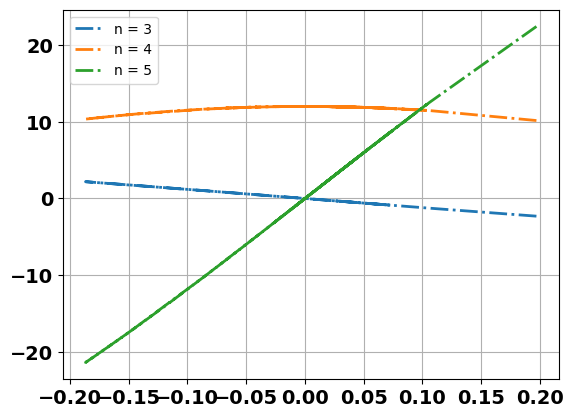

In [34]:
##same x as above ##example
for n in np.arange(3,6,1):
    sol = HERMITE(y1_list_multiple[0],n)
    plt.plot(y1_list_multiple[0],sol,"-.",label = "n = " + str(n),linewidth=2)
plt.xticks(fontsize=14,fontweight="bold")
plt.yticks(fontsize=14,fontweight="bold")
plt.grid()
plt.legend()
plt.show()

In [35]:
def hermite_solutions(values):
    for n in np.arange(3,6,1):
        sol = HERMITE(values,n)
        
    return sol

In [36]:
#list of sol
sol_list_single = []
for i in range(0, len(y1_list_single)):
    sol_list_single.append(hermite_solutions(y1_list_single[i])) ##most reliable features found

In [37]:
len(sol_list_single)  ##true

1647

In [38]:
#list of sol
sol_list_multiple = []
for i in range(0, len(y1_list_multiple)):
    sol_list_multiple.append(hermite_solutions(y1_list_multiple[i])) ##most reliable features found

In [39]:
len(sol_list_multiple)

1647

In [75]:
%store

Stored variables and their in-db values:


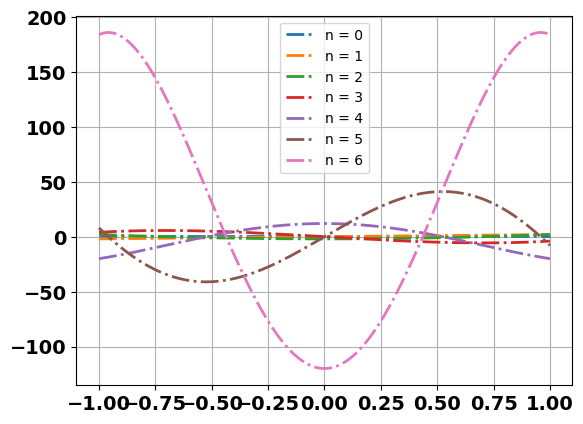

In [141]:
######REFERENCE
'''xvals = np.linspace(-1.0,1.0,1000)
for n in np.arange(0,7,1):
    sol = HERMITE(xvals,n)
    plt.plot(xvals,sol,"-.",label = "n = " + str(n),linewidth=2)
plt.xticks(fontsize=14,fontweight="bold")
plt.yticks(fontsize=14,fontweight="bold")
plt.grid()
plt.legend()
plt.show()'''

In [40]:
y1_list_single[0]##example on 0.txt

array([-7.07498315e-02, -3.42881180e-02, -1.77666234e-02, -8.76357158e-03,
       -4.17874999e-03, -4.48736403e-03, -2.59230735e-03,  1.01264313e-03,
        2.04593531e-04, -1.38414059e-03, -2.19639290e-03, -5.58067352e-04,
        1.15459328e-03, -3.05411986e-05,  8.30649276e-04,  3.85961379e-04,
       -1.89836259e-03, -4.22956779e-04,  9.13131904e-04,  4.16834918e-04,
       -4.25958881e-04,  6.09674666e-04, -3.96912261e-05, -7.97606295e-05,
       -3.96512302e-04, -8.54242784e-04,  3.77591496e-04,  7.08893491e-04,
        3.81061010e-03,  3.03975033e-03,  2.93789356e-03,  2.88340406e-03,
       -3.01824635e-03, -2.21143578e-03,  2.52052571e-04,  2.67894166e-03,
        3.61937566e-03, -2.06886765e-03, -1.74040342e-03,  7.72990148e-04,
        2.89706759e-04, -1.13330987e-03,  2.54263907e-03,  2.06460010e-03,
       -1.99779125e-03, -1.72157313e-03, -3.63827096e-03,  1.84110272e-03,
        2.28191750e-03, -3.36731007e-03, -8.32963577e-05,  1.29391199e-03,
        1.11243586e-03,  

In [41]:
y1_list_multiple[0]

array([ 1.96963757e-01,  1.05719873e-01,  5.20617120e-02,  2.75503974e-02,
        1.47999182e-02,  1.83781622e-03, -7.88171124e-04,  6.57923616e-03,
        3.00765647e-03, -2.56687259e-03, -1.27923037e-04,  3.08235721e-04,
        1.61182983e-03,  2.48683036e-03,  3.04326483e-03,  6.31747597e-04,
       -4.26283016e-03, -4.02547777e-04,  2.71660058e-03,  4.74385792e-04,
        2.36762454e-04,  7.30683776e-04,  3.78078411e-05,  1.01004418e-03,
       -1.77016668e-03, -3.95685118e-03, -1.58191976e-03,  6.64129326e-04,
        8.47415921e-03,  8.47977721e-03,  4.29225812e-03,  4.42170897e-03,
       -6.59793625e-03, -6.13538545e-03,  1.25838220e-03,  3.79619537e-03,
        4.83845126e-03, -5.36110778e-03, -5.30307860e-03,  3.67212081e-04,
       -4.70402085e-04, -3.64896452e-03,  4.86086532e-03,  2.61739750e-03,
       -5.33412648e-03, -7.15532781e-03, -9.99956767e-03,  2.04442572e-03,
        4.53760200e-03, -5.47340055e-03, -7.08082130e-03,  1.29050458e-03,
        2.41980547e-03,  

In [42]:
sol_list_single[0] ##example on 0.txt

array([-8.43337394e+00, -4.10812581e+00, -2.13109757e+00, -1.05152090e+00,
       -5.01438323e-01, -5.38469227e-01, -3.11074095e-01,  1.21517009e-01,
        2.45512224e-02, -1.66096447e-01, -2.63565453e-01, -6.69680544e-02,
        1.38550948e-01, -3.66494383e-03,  9.96778214e-02,  4.63153563e-02,
       -2.27802417e-01, -5.07548013e-02,  1.09575707e-01,  5.00201786e-02,
       -5.11150534e-02,  7.31609237e-02, -4.76294713e-03, -9.57127546e-03,
       -4.75814663e-02, -1.02509034e-01,  4.53109709e-02,  8.50671619e-02,
        4.57264358e-01,  3.64765545e-01,  3.52543170e-01,  3.46004651e-01,
       -3.62185163e-01, -2.65370563e-01,  3.02463060e-02,  3.21469923e-01,
        4.34317493e-01, -2.48262701e-01, -2.08847567e-01,  9.27587439e-02,
        3.47648072e-02, -1.35996952e-01,  3.05114059e-01,  2.47750604e-01,
       -2.39733674e-01, -2.06587959e-01, -4.36584810e-01,  2.20931328e-01,
        2.73828199e-01, -4.04071100e-01, -9.99556283e-03,  1.55269092e-01,
        1.33492083e-01,  

In [43]:
sol_list_multiple[5] ##example from sol_list

array([-1.90755758e+01, -9.81760215e+00, -5.32942332e+00, -3.09470097e+00,
       -1.54889043e+00, -1.17451497e+00, -7.31606265e-01, -9.56094695e-01,
       -1.02213033e+00, -6.67265423e-01, -6.64505197e-01, -6.61452473e-01,
       -9.07815429e-01, -1.10264124e+00, -6.63960600e-01, -1.74390981e-01,
       -6.42396552e-01, -6.44070415e-01, -4.38794648e-01, -1.08026110e-01,
        3.61694753e-02, -5.44999711e-01, -4.78934110e-01, -6.98537798e-01,
       -1.60829245e+00, -1.05370342e+00, -2.24557128e-01, -5.58433152e-01,
       -4.81405298e-01, -6.61067120e-01, -7.56213059e-01, -1.03022636e+00,
       -9.50947590e-01, -7.46171059e-01, -8.99097783e-01, -2.26816748e-01,
       -5.83988290e-01, -1.12523423e-01,  2.98747659e-01,  3.42143890e-01,
        9.79900138e-01,  7.30879887e-01,  3.60710583e-02, -1.39592213e+00,
       -1.95025243e+00, -9.15301159e-01,  9.93331445e-02,  3.44364569e-01,
        7.85273174e-02, -5.43075840e-01, -5.20242100e-01, -5.09233719e-01,
       -3.39655185e-01,  

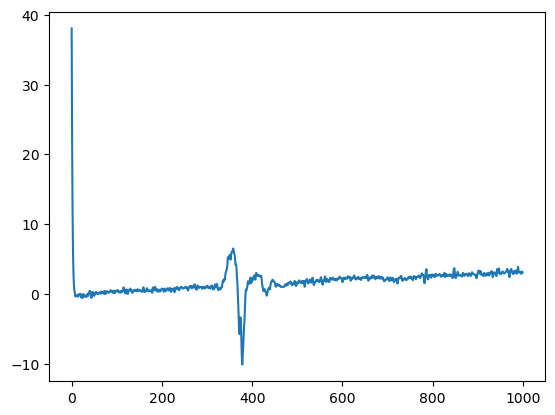

In [46]:
sample = plt.plot(sol_list_single[5]) ##after transformed features ##only reliable s-t peaks are shown, check with butterwoth filter as well
##sample on first ecg, SAVE PLOT AS IMAGE FIRST
image = plt.savefig('sample_ecg_0.png')

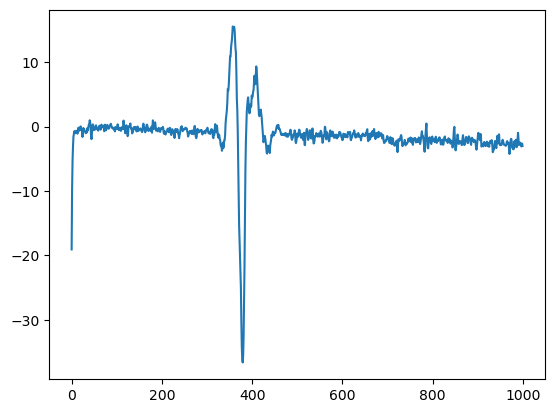

In [117]:
plt.plot(sol_list_multiple[5])

In [52]:
def filtered_image_from_array(array, path, flag = 'single'):
    if(flag == 'multiple'):
        plt.plot(array, color = 'red')
    else:
        plt.plot(array)
    
    plt.savefig(path)
    plt.clf()
    plt.cla()
    plt.close()

In [48]:
np.unique(ptb_label_list) #15 labels

array([' Bundle branch block', ' Cardiomyopathy', ' Dysrhythmia',
       ' Healthy control', ' Heart failure (NYHA 2)',
       ' Heart failure (NYHA 3)', ' Heart failure (NYHA 4)',
       ' Hypertrophy', ' Myocardial infarction', ' Myocarditis',
       ' Palpitation', ' Stable angina', ' Unqualified',
       ' Unstable angina', ' Valvular heart disease'], dtype='<U23')

In [49]:
check = []

In [90]:
##save all filtered images  ##rerun for more images
for i in range(0, 80): ##in batches of 80 since buffers get full
    #randomize number from 0-1646 ---> j
    #this j is the same as the label
    #j = random.randint(250, 350)
    #check.append(j)
    #for item, count in collections.Counter(check).items():
        #if count > 1:
            #continue
        #else:
    name = 'ptb_ecg_filtered/' + str(i) +'_' + ptb_label_list[i] + '.png'
    filtered_image_from_array(sol_list_single[i], name)

In [88]:
#check

In [110]:
for i in range(1600, 1647): ##in batches of 100 since buffers get full
    name = 'ptb_ecg_filtered/' + str(i) +'_multiple_' + ptb_label_list[i] + '.png'
    filtered_image_from_array(sol_list_multiple[i], name, 'multiple')